# Tutorial of Backpropagation on MNIST

In [1]:
seed = 42

import time
from mlp import SequentialModel, DenseLayer, MLP
import numpy as np
np.random.seed(seed)

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
# loading the MNIST datatset
import pickle, gzip

f = gzip.open('mnist.pkl.gz','rb')
train, val, test = pickle.load(f, encoding='latin1')
f.close()

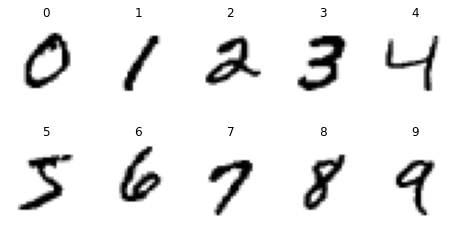

In [3]:
# visualise some examples from the dataset 
fig, ax = plt.subplots(2,5, figsize=(8, 4))
for i, ax in enumerate(ax.flatten()):
    idx = np.argwhere(train[1] == i)[0][0]
    reshaped_image = np.reshape(train[0][idx], (28, 28))
    ax.imshow(reshaped_image, cmap='gray_r')
    ax.set_title(f'{i}')
    ax.axis('off')

In [4]:
def make_set(data, count, classes=10):
    """
    transform mnist read-in data into X,y where y is one-hot-encoded
    """
    
    X = data[0][:count, :]
    
    y = np.zeros((count, classes))
    y[np.arange(count),data[1][:count]] = 1
    
    return X, y

In [5]:
# subsample the data for quicker training, validation, and testing
train_count = 10000
val_count = 1000
test_count = 5000

X_train, y_train = make_set(train, train_count)
X_val, y_val = make_set(val, val_count)
X_test, y_test = make_set(test, test_count)

# Training the MLP Classifier

In [6]:
start = time.time()

best_beta = 1.0
best_momentum = 0.80
best_lr = 0.8
best_niterations = 1000

N = X_train.shape[1]
model = SequentialModel([
                        DenseLayer(15, activation='sigmoid', input_size=N, name='weights_1'),
                        DenseLayer(8, activation='sigmoid', name='weights_2'),
                        DenseLayer(10, activation='softmax', name='weights_out')
                        ], 
                        lr=best_lr, 
                        momentum=best_momentum)

model.train(X_train, y_train, best_niterations)
    
evaluation = model.evaluate(X_val, y_val)
print(f'time: {time.time() - start:.3f} s')

Iteration:  0 Loss:  0.22700823265249054
Iteration:  100 Loss:  0.2040703470794135
Iteration:  200 Loss:  0.17461348525160492
Iteration:  300 Loss:  0.14389391352232325
Iteration:  400 Loss:  0.12430295604218079
Iteration:  500 Loss:  0.1018516486108009
Iteration:  600 Loss:  0.08231188947612056


/Users/ucherekjared/Personal_Github/backprop-tutorial/mlp.py:35: RuntimeWarning: overflow encountered in exp
  fn = lambda x: 1 / (1 + np.exp(-x))


Iteration:  700 Loss:  0.07172079950661053
Iteration:  800 Loss:  0.060983616287311054
Iteration:  900 Loss:  0.057367588173431065
Confusion Matrix:
[[ 97.   0.   0.   2.   0.   2.   4.   1.   0.   1.]
 [  0. 103.   1.   0.   0.   0.   0.   3.   4.   1.]
 [  1.   2.  84.   6.   0.   5.   2.   2.   2.   0.]
 [  0.   1.   4.  90.   0.   8.   0.   4.   6.   3.]
 [  0.   0.   0.   1.  85.   4.   8.   1.   1.   7.]
 [  0.   0.   1.   1.   1.  36.   0.   0.   1.   3.]
 [  0.   0.   0.   0.   0.   4.  85.   1.   0.   1.]
 [  0.   1.   1.   0.   0.   1.   0.  93.   2.  10.]
 [  2.   0.   2.   3.   2.  28.   5.   0.  89.   3.]
 [  0.   0.   0.   2.   1.   3.   0.   1.   2.  69.]]
Accuracy: 83.1000
time: 253.683 s


In [8]:
# TODO: run the following code to save the best parameters and 
# the weights of the network that achieves the desired accuracy
best_parameters = {
    'beta': best_beta,
    'momentum': best_momentum,
    'lr': best_lr,
    'niterations': best_niterations,
    model.layers[0].name: model.layers[0].W,
    model.layers[1].name: model.layers[1].W,
    model.layers[2].name: model.layers[2].W,
}

with open('best_params.pkl', 'wb') as handle:
    pickle.dump(best_parameters, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Loading the best model and continue training:

In [9]:
with open('best_params.pkl', 'rb') as handle:
    best_parameters = pickle.load(handle)

In [11]:
best_beta = best_parameters['beta']
best_momentum = best_parameters['momentum']
best_lr = best_parameters['lr']
best_niterations = best_parameters['niterations']
best_model = SequentialModel([
                        DenseLayer(15, activation='sigmoid', input_size=N, name='weights_1'),
                        DenseLayer(8, activation='sigmoid', name='weights_2'),
                        DenseLayer(10, activation='softmax', name='weights_out')
                        ], 
                        lr=best_lr, 
                        momentum=best_momentum)

# load weights
best_model.layers[0].W = best_parameters[best_model.layers[0].name]
best_model.layers[1].W = best_parameters[best_model.layers[1].name]
best_model.layers[2].W = best_parameters[best_model.layers[2].name]

In [13]:
best_model.train(X_train, y_train, 201)

/Users/ucherekjared/Personal_Github/backprop-tutorial/mlp.py:35: RuntimeWarning: overflow encountered in exp
  fn = lambda x: 1 / (1 + np.exp(-x))


Iteration:  0 Loss:  0.048236595518838514
Iteration:  100 Loss:  0.04634556438624488
Iteration:  200 Loss:  0.0394996771380869


In [15]:
evaluation = best_model.evaluate(X_val, y_val)

Confusion Matrix:
[[ 98.   0.   0.   1.   1.   4.   6.   1.   0.   2.]
 [  0. 101.   0.   0.   0.   0.   0.   4.   0.   1.]
 [  1.   4.  82.   4.   0.   2.   1.   2.   5.   0.]
 [  0.   0.   8.  93.   0.   8.   0.   4.  10.   5.]
 [  0.   1.   0.   1.  85.   5.   8.   1.   0.   6.]
 [  1.   0.   0.   2.   3.  65.   1.   1.  13.   4.]
 [  0.   0.   0.   0.   0.   1.  83.   0.   1.   0.]
 [  0.   1.   1.   1.   0.   1.   0.  92.   4.  11.]
 [  0.   0.   2.   1.   0.   5.   5.   0.  73.   0.]
 [  0.   0.   0.   2.   0.   0.   0.   1.   1.  69.]]
Accuracy: 84.1000


# Compare to Keras:

much faster, and ADAM optimizer must be really good to use here... https://keras.io/examples/vision/mlp_image_classification/

In [27]:
from numpy import loadtxt

from keras.models import Sequential
from keras.layers import Dense
from keras.metrics import Accuracy

import tensorflow as tf
from tensorflow.math import confusion_matrix

In [54]:
model = Sequential()
model.add(Dense(15, input_dim=784, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [55]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [56]:
model.fit(X_train, y_train, epochs=1000, validation_data=(X_val, y_val), 
          batch_size=X_train.shape[0], verbose=0)

In [57]:
m = tf.keras.metrics.Accuracy()
m.update_state(model.predict(X_val).argmax(axis=1), y_val.argmax(axis=1))
m.result().numpy()

print(confusion_matrix(model.predict(X_val).argmax(axis=1), y_val.argmax(axis=1)))
print(f'Accuracy: {m.result().numpy():0.4f}')

tf.Tensor(
[[ 99   2   0   3   0   2   1   5   2   3]
 [  0 101   0   0   0   0   1   1   1   0]
 [  1   0  83   1   0   1   4   1   1   0]
 [  0   0   2  89   0   4   1   3   7   1]
 [  0   1   0   0  83   2   0   1   2   7]
 [  0   0   0   4   1  77   0   0   1   2]
 [  0   3   2   1   2   1  93   0   0   0]
 [  0   0   2   0   0   2   0  94   0   7]
 [  0   0   3   4   1   1   4   1  89   4]
 [  0   0   1   3   2   1   0   0   4  74]], shape=(10, 10), dtype=int32)
Accuracy: 0.8820
